<span style="font-family: 'Times New Roman'; font-size: 18px;">

# Sentiment Analysis of Yelp Reviews
### A Binary Classification using NLP
### Introduction

This NLP project aims to categorize Yelp users based on their experiences, determining whether they had a favorable or unfavorable encounter. We focus on classifying reviews into one-star or five-star ratings and employ a pipeline approach in our analysis.
The information used in this analysis comes from Kaggle. 
<br>Each review reflects the experience of a business as reported on Yelp. The star rating column ranges from 1 to 5, with higher numbers signifying a more positive experience.
<br>The "cool" column displays the total count of cool votes received from users, starting at zero and with no cap on the number of votes a review can accumulate. The columns for "useful" and "funny" votes function in the same manner as the cool column.


</span>

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Import libraries

We import the usual libraries for a python project. 

</span>

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Get the Data

We open the yelp.csv document and refer to it as yelp. 
</span>

In [8]:
yelp = pd.read_csv('yelp.csv')

<span style="font-family: 'Times New Roman'; font-size: 18px;">


We explore the functions info(), head(), and describe() available in the dataframe yelp. 
</span>


In [9]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [11]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


<span style="font-family: 'Times New Roman'; font-size: 18px;">


A new column named "text length" is added, indicating the total word count found in the text column. </span>


In [12]:
yelp['text length'] = yelp['text'].apply(len)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Exploratory Data Analysis 

It's time to begin exploratory data analysis. 
<br> A facit grid is employed to generate five separate histograms that compare the stars with the length of the text. Each star has its own dedicated histogram. 
</span>


In [13]:
sns.set_style('white')

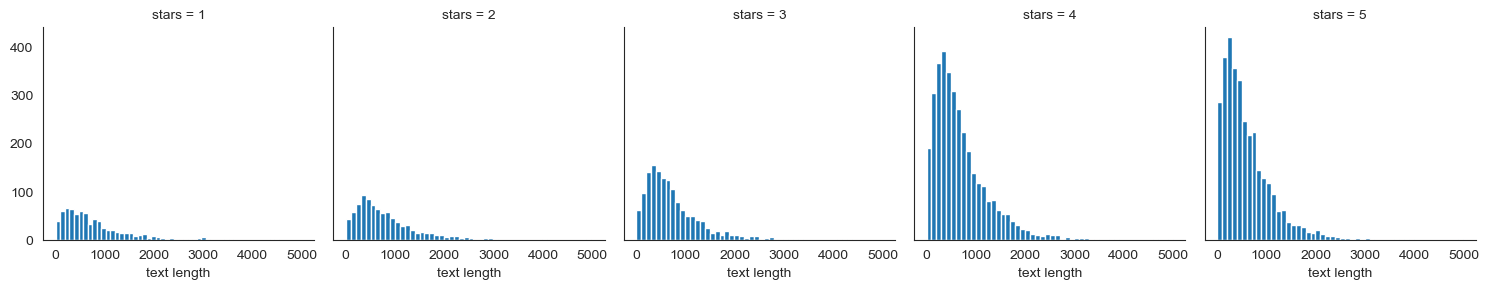

In [14]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length', bins=50)

<span style="font-family: 'Times New Roman'; font-size: 18px;">


Subsequently, we generate a box plot illustrating the length of text corresponding to each star rating. </span>

C:\Users\rojin\AppData\Local\Temp\ipykernel_12732\203086975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars',y='text length',data=yelp, palette='rainbow')


<Axes: xlabel='stars', ylabel='text length'>

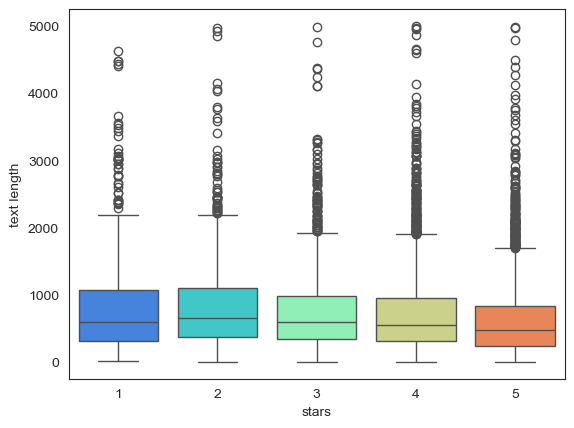

In [15]:
sns.boxplot(x='stars',y='text length',data=yelp, palette='rainbow')

<span style="font-family: 'Times New Roman'; font-size: 18px;">


Then we create a count plot for each star category.
</span>


C:\Users\rojin\AppData\Local\Temp\ipykernel_12732\2116447000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars',data=yelp,palette='rainbow')


<Axes: xlabel='stars', ylabel='count'>

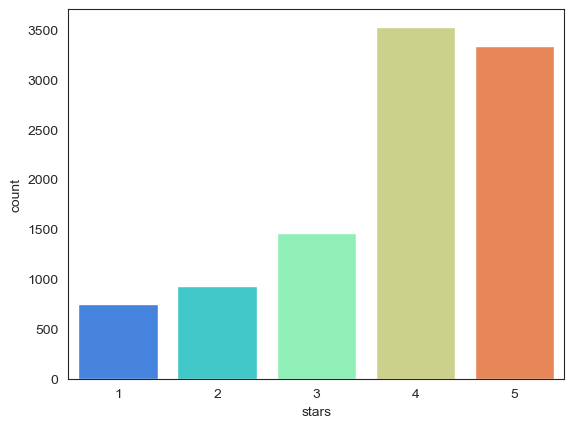

In [16]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

<span style="font-family: 'Times New Roman'; font-size: 18px;">

To determine the average of numerical data, we utilize the groupby method. 
</span>


In [17]:
import pandas as pd

# Select only numeric columns
numeric_cols = yelp.select_dtypes(include='number').columns

# Group by 'stars' and calculate the mean of numerical columns only
stars = yelp.groupby('stars')[numeric_cols].mean()

stars


,stars,cool,useful,funny,text length
stars,,,,,
1,1.0,0.576769,1.604806,1.056075,826.515354
2,2.0,0.719525,1.563107,0.875944,842.256742
3,3.0,0.788501,1.306639,0.694730,758.498289
4,4.0,0.954623,1.395916,0.670448,712.923142
5,5.0,0.944261,1.381780,0.608631,624.999101


<span style="font-family: 'Times New Roman'; font-size: 18px;">

By employing the corr method alongside the group by approach on the dataframe, we can assess the correlation among different columns. </span>

In [18]:
stars.corr()

,stars,cool,useful,funny,text length
stars,1.000000,0.964758,-0.761288,-0.950389,-0.950171
cool,0.964758,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.761288,-0.743329,1.000000,0.894506,0.699881
funny,-0.950389,-0.944939,0.894506,1.000000,0.843461
text length,-0.950171,-0.857664,0.699881,0.843461,1.000000


<span style="font-family: 'Times New Roman'; font-size: 18px;">

By leveraging seaborn, we can produce a heatmap that visualizes correlations, using our dataframe as the basis for this representation.  </span>

<Axes: >

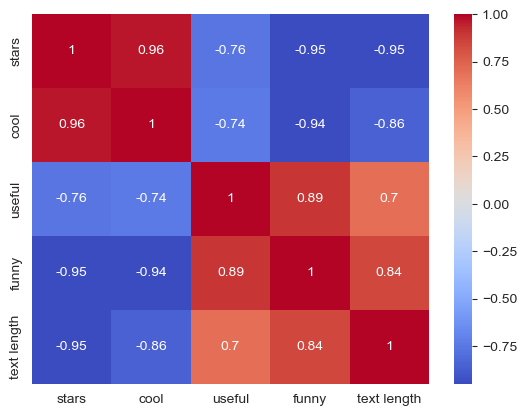

In [19]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### NLP Classification
To streamline the process, we focus solely on reviews rated with either 1 or 5 stars. We generate a new dataframe named yelp_class that contains only these specific ratings.

</span>

In [20]:
yelp_class = yelp[(yelp['stars']==1)|(yelp['stars']==5)]


In [21]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


<span style="font-family: 'Times New Roman'; font-size: 18px;">

The yelp_class dataframe was divided into two distinct groups, labeled x and y, where each group represents a 
particular value. Group x holds textual data, while group y consists of star ratings.
</span>

In [22]:
x = yelp_class['text']
y = yelp_class['stars']

<span style="font-family: 'Times New Roman'; font-size: 18px;">

We produce and import CountVectorizer. </span>

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

<span style="font-family: 'Times New Roman'; font-size: 18px;">

The fit_transform method is employed on the CountVectorizer object to change 
text data into a matrix that counts the occurrences of tokens. 
</span>

In [24]:
x = cv.fit_transform(x)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Train Test Split 
The CountVectorizer's fit_transform method transforms textual information into a numerical representation suitable for machine learning algorithms. Subsequently, employing train_test_split guarantees the creation of distinct training and testing datasets, allowing for a precise assessment of the model's effectiveness.

</span>

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Training a Model
We employ MultinomialNB to develop a model capable of categorizing text according to the frequency of words. 

</span>

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

<span style="font-family: 'Times New Roman'; font-size: 18px;">

At this point, we adjust the nb model utilizing the training dataset.


</span>

In [28]:
nb.fit(X_train,y_train)

MultinomialNB()

<span style="font-family: 'Times New Roman'; font-size: 18px;">

### Predictions and Evaluations
Our goal is to assess how well our model performs by utilizing the predict method on the X_test dataset. 
</span>

In [29]:
predictions = nb.predict(X_test)

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Utilizing the predictions made earlier along with y_test, we generate a classification report and a confusion matrix.

</span>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



<span style="font-family: 'Times New Roman'; font-size: 18px;">

Analyzing the table presented above reveals that, overall, our model demonstrates strong performance, particularly in class 5. While class 1 has some areas that could be enhanced, it is generally quite successful. The total percentage of accurate forecasts stands at 93%.
    
### Using Text Processing
We should explore the outcome of incorporating TF-IDF into this procedure through a pipeline approach. 
It's time to incorporate the TF-IDFTransformer from the sklearn package. 
</span>

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

<span style="font-family: 'Times New Roman'; font-size: 18px;">    
Now let's import Pipeline from sklearn.
</span>

In [33]:
from sklearn.pipeline import Pipeline

<span style="font-family: 'Times New Roman'; font-size: 18px;">

Below we created a pipeline with the following steps: CountVectorizer(), Tf-IDFTransformer(),MultinomialNB(). 
It is evident that CountVectorizer transforms textual information into a "bag of words" model, converting each individual word into a numerical feature. Subsequently, it utilizes the TF-IDF method to convert the word frequencies, assigning significance to words based on their relevance within the document. Ultimately, it prepares the Multinomial Naive Bayes model to learn from these TF-IDF features. 
</span>

In [34]:
pipe = Pipeline([('bow',CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                 ('model',MultinomialNB())])

<span style="font-family: 'Times New Roman'; font-size: 18px;">   
    
### Using the Pipeline
The pipeline we have established encompasses every necessary preprocessing phase. As a result, it is necessary for us to divide our initial dataset again into training and testing groups. By dividing the initial unprocessed text data again, we guarantee that the entire process can manage all aspects from beginning to end, which includes accurately partitioning the data for both training and evaluation.

</span>

In [35]:
x =yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=101)


<span style="font-family: 'Times New Roman'; font-size: 18px;">    
Now let's fit the pipeline to the training data. Please note that we shouldn't utilize the previous training dataset, as it has already undergone vectorization. It is essential for us to submit only the text along with the corresponding labels.</span>


In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])


<span style="font-family: 'Times New Roman'; font-size: 18px;">    
    
### Predictions and Evaluation
Now we use the pipeline to create classification report and confusion matrix. We notice a strange result. It seems the TF-IDF made things worse.

</span>


In [37]:
predictions = pipe.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rojin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<span style="font-family: 'Times New Roman'; font-size: 18px;">    

### Conclusion

Based on the implementation of our pipeline, which included the use of  CountVectorizer, TF-IDF Transformer, and MultinomialNB, we were able to classify Yelp reviews into 1-star or 5-star categories. The model achieved an overall accuracy of 81%, with a notable precision and recall for 5-star reviews, highlighting its effectiveness in identifying positive feedback. Please note that using TF-IDF did not result in a better outcome. 

The model struggled to correctly classify 1-star reviews, resulting in lower precision, recall, and F1-score for this category. This discrepancy suggests a need for further optimization, perhaps through additional feature engineering or hyperparameter tuning, to better balance the model's performance across all classes.

In summary, while our pipeline shows promise with strong results for 5-star reviews, there is room for improvement in accurately capturing negative feedback, which is crucial for a holistic understanding of customer sentiments.

</span>